In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("rendimientosegundaversion_formateado.csv")

### Tiempo Medio por URL

In [3]:
urls = df.groupby("URL").sum()

print("MEDIA: " + str(urls.mean()["TIME"]) + " ms")
print("DESVIACION TIPICA: " + str(urls.std()["TIME"]) + " ms")

MEDIA: 7172.481356250116 ms
DESVIACION TIPICA: 7889.274592050425 ms


### Percentil 90

In [4]:
print("Percentil 90: " + str(urls.quantile(0.9)["TIME"]) + " ms")

Percentil 90: 14657.920199999999 ms


### Tiempo Medio por Vista

                  TIME
VISTA                 
articulo   5075.364959
categoria  2148.001259
grupo      1211.167822
                  TIME
VISTA                 
articulo   4091.013957
categoria  1818.830288
grupo      1083.482451


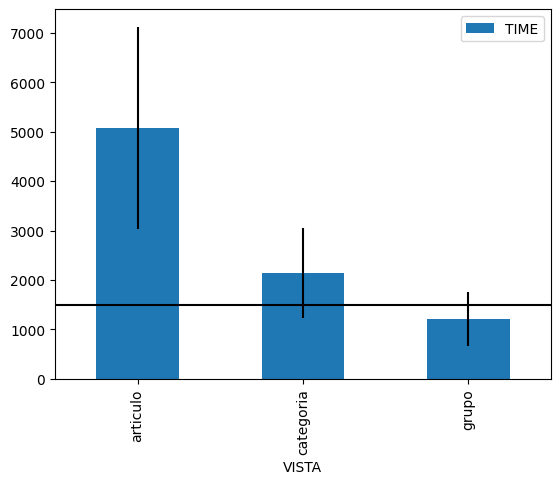

In [9]:
#vista = df.groupby(["URL", "VISTA"]).sum()

vista = df[df["SECCION"] != "Renderizado"]

vista = vista.groupby(["URL", "VISTA"]).sum()

print(vista.groupby("VISTA").mean())
print(vista.groupby("VISTA").std())

vista.groupby("VISTA").mean().plot(kind="bar", yerr = vista.groupby("VISTA").std() / 2)

plt.axhline(y=1500, color='black', linestyle='-')

### Tiempo Medio por Secciones en Categorias

                                        TIME
SECCION                                     
Libra                             519.296563
Permisos                           69.891229
addCategoriaJsonTime                0.773610
banerTime                           0.077502
cacheoPreciosTime                 834.578830
carruselesGroupModeTime           617.681249
carruselesTime                    846.835811
contexTime                         54.486849
creacionResponseTime              242.320578
fechaCalculoNumeroArticulosTime    59.339219
filtradoGruposTime                  0.878685
filtradoTime                        1.849570
getObjectTime                       4.533699
metatagsTime                        0.048640
navCatTime                          0.183224
navcatTime                          7.031240
obtencionGruposTime                 4.075605
ocultarFiltrosTime                469.974985
ordenadoItemsTime                  76.087953
ordenadoTime                       37.069713
paginacion

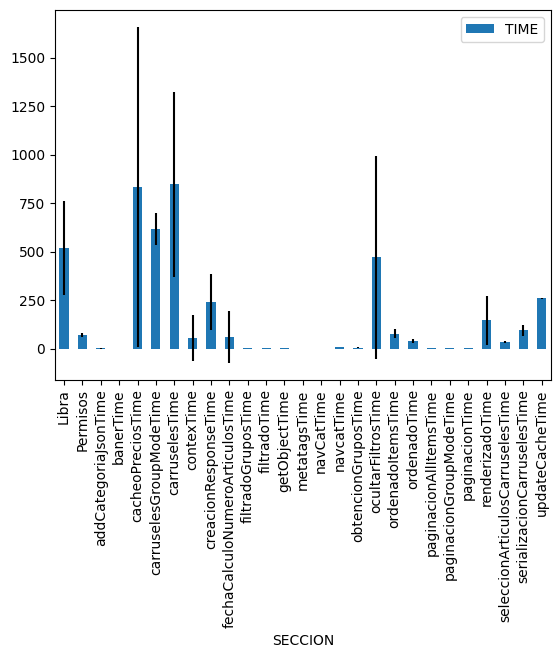

In [10]:
""" categoria = df[df["VISTA"] == "categoria"]

categoria_filtrado = categoria[(categoria["SECCION"] != "Renderizado") & (categoria["SECCION"] != "Datos")]

categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2)

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))

 """

df = df.dropna()

categoria = df[df["VISTA"] == "categoria"]

categoria_filtrado = categoria[(categoria["SECCION"] != "Renderizado") & (categoria["SECCION"] != "Datos")]

categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2)

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))


### Tiempo Medio por Secciones en Grupos

                             TIME
SECCION                          
Datos                    4.683093
Libra                  276.616576
Permisos                66.514768
cacheoPreciosTime      279.005639
consultaArbolTime       17.906571
filtradoArticulosTime    0.695096
generacionFiltrosTime  487.981263
generarContextoTime      0.463310
getObjectTime            4.625673
mapeoArticulosTime       0.178218
metatagTime              0.049481
migasPanTime            16.164615
ordenarItemsTime        55.856506
paginacionItemsTime      0.427014
                             TIME
SECCION                          
Datos                    2.425455
Libra                  197.225334
Permisos                18.334662
cacheoPreciosTime      198.263686
consultaArbolTime        2.211161
filtradoArticulosTime    1.339745
generacionFiltrosTime  910.161444
generarContextoTime      0.357632
getObjectTime            2.424828
mapeoArticulosTime       0.232066
metatagTime              0.010235
migasPanTime  

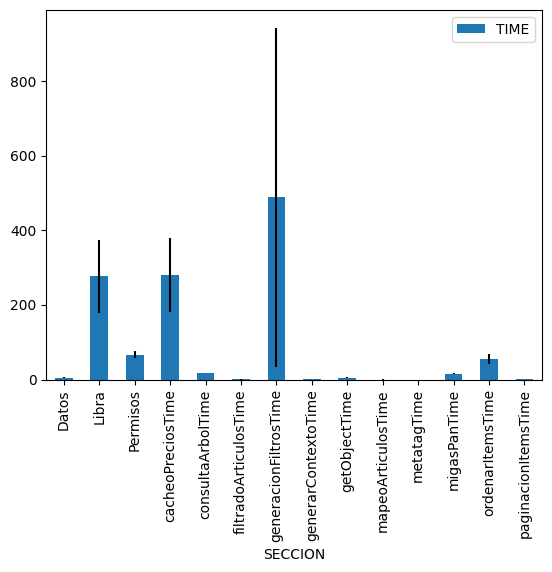

In [11]:
df = df.dropna()

grupo = df[df["VISTA"] == "grupo"]

#grupo_filtrado = grupo
grupo_filtrado = grupo[grupo["SECCION"] != "Renderizado"]

grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std() / 2)

print(grupo_filtrado.groupby("SECCION").mean())
print(grupo_filtrado.groupby("SECCION").std(ddof=0))

### Tiempo Medio por Secciones en Articulos

                              TIME
SECCION                           
Datos                   235.618973
Libra                   899.643599
Permisos                 66.127688
articuloArbolTime        76.123356
atributosGrupoTime      142.195571
cachePrecioTime         153.418393
carruselesTime            0.278395
contextoTime              6.398977
generarCarruselesTime  3489.521566
getGrupoTime              5.868977
mapaPreciosTime           0.084522
metatagsTime              0.084941
                              TIME
SECCION                           
Datos                    50.276212
Libra                   190.409851
Permisos                226.532876
articuloArbolTime        22.345795
atributosGrupoTime      265.051591
cachePrecioTime          44.948398
carruselesTime            0.082945
contextoTime              3.001296
generarCarruselesTime  4049.045985
getGrupoTime              0.313258
mapaPreciosTime           0.067565
metatagsTime              0.020213


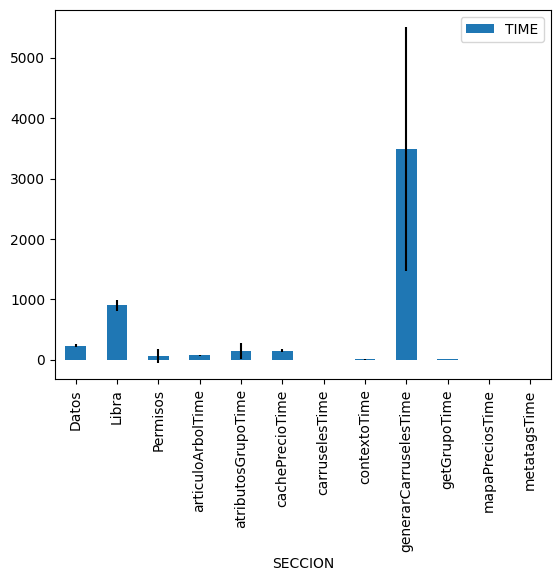

In [12]:
articulo = df[df["VISTA"] == "articulo"]

articulo_filtrado = articulo[articulo["SECCION"] != "Renderizado"]

articulo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = articulo_filtrado.groupby("SECCION").std() / 2)

print(articulo_filtrado.groupby("SECCION").mean())
print(articulo_filtrado.groupby("SECCION").std(ddof=0))

### Tiempo Medio Libra

               TIME
SECCION            
Libra    835.619728
               TIME
SECCION            
Libra    273.389462


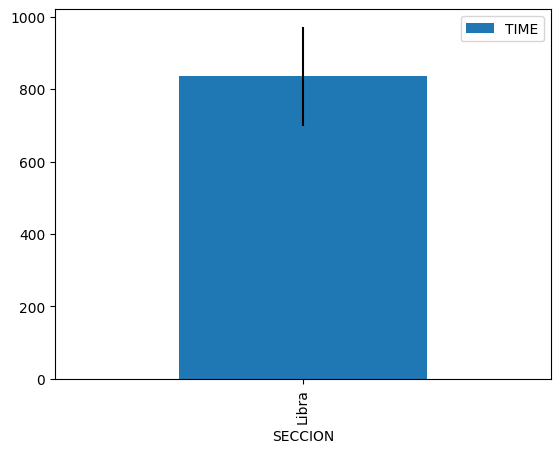

In [13]:
libra = df[df["SECCION"] == "Libra"].groupby("SECCION").mean()

libra.plot(kind="bar", yerr=df[df["SECCION"] == "Libra"].groupby("SECCION").std() / 2)

print(libra)
print(df[df["SECCION"] == "Libra"].groupby("SECCION").std())


In [14]:

categorias = df[df["VISTA"] == "categoria"]
grupos = df[df["VISTA"] == "grupo"]
articulos = df[df["VISTA"] == "articulo"]

categorias_filtradas = categorias.groupby("SECCION", as_index=False).mean()
grupos_filtrados = grupos.groupby("SECCION", as_index=False).mean()
articulos_filtrados = articulos.groupby("SECCION", as_index=False).mean()

print(categorias_filtradas)
print(grupos_filtrados)
print(articulos_filtrados)

                             SECCION         TIME
0                              Datos    11.626568
1                              Libra   519.296563
2                           Permisos    69.891229
3                        Renderizado  1027.419198
4               addCategoriaJsonTime     0.773610
5                          banerTime     0.077502
6                  cacheoPreciosTime   834.578830
7            carruselesGroupModeTime   617.681249
8                     carruselesTime   846.835811
9                         contexTime    54.486849
10              creacionResponseTime   242.320578
11   fechaCalculoNumeroArticulosTime    59.339219
12                filtradoGruposTime     0.878685
13                      filtradoTime     1.849570
14                     getObjectTime     4.533699
15                      metatagsTime     0.048640
16                        navCatTime     0.183224
17                        navcatTime     7.031240
18               obtencionGruposTime     4.075605


In [15]:

libra_categorias = int(categorias_filtradas[categorias_filtradas["SECCION"] == "Libra"]["TIME"])
libra_articulos = int(articulos_filtrados[articulos_filtrados["SECCION"] == "Libra"]["TIME"])
libra_grupos = int(grupos_filtrados[grupos_filtrados["SECCION"] == "Libra"]["TIME"])


torvigo_categorias = df[df["VISTA"] == "categoria"]
torvigo_categorias = torvigo_categorias[(torvigo_categorias["SECCION"] != "Libra") & (torvigo_categorias["SECCION"] != "Renderizado")]
torvigo_categorias = torvigo_categorias.groupby(["URL", "VISTA"]).sum()
torvigo_categorias = int(torvigo_categorias.groupby("VISTA").mean()["TIME"])


torvigo_grupos = df[df["VISTA"] == "grupo"]
torvigo_grupos = torvigo_grupos[(torvigo_grupos["SECCION"] != "Libra") & (torvigo_grupos["SECCION"] != "Renderizado")]
torvigo_grupos = torvigo_grupos.groupby(["URL", "VISTA"]).sum()
torvigo_grupos = int(torvigo_grupos.groupby("VISTA").mean()["TIME"])


torvigo_articulos = df[df["VISTA"] == "articulo"]
torvigo_articulos = torvigo_articulos[(torvigo_articulos["SECCION"] != "Libra") & (torvigo_articulos["SECCION"] != "Renderizado")]
torvigo_articulos = torvigo_articulos.groupby(["URL", "VISTA"]).sum()
torvigo_articulos = int(torvigo_articulos.groupby("VISTA").mean()["TIME"])

print(libra_categorias)
print(libra_grupos)
print(libra_articulos)

print(torvigo_categorias)
print(torvigo_grupos)
print(torvigo_articulos)


519
276
899
1628
934
4175


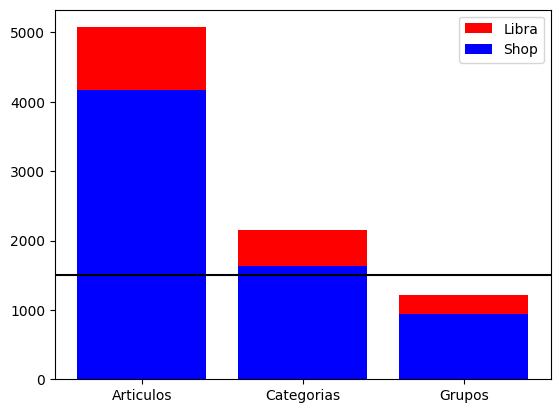

In [16]:

data = pd.DataFrame({
                        "Torvigo" : [torvigo_articulos, torvigo_categorias, torvigo_grupos],
                        "Libra" : [libra_articulos, libra_categorias, libra_grupos],
                    },
                    index=('Articulos', "Categorias", "Grupos",))


plt.bar(data.index, data.Torvigo + data.Libra, label='Libra', color="red")

plt.bar(data.index, data.Torvigo, label='Shop', color="blue")

plt.legend(loc='best')

plt.axhline(y=1500, color='black', linestyle='-')

plt.show()

In [47]:
categorias_group_mode = df[df["URL"].str.contains("group_mode=true")]
categorias_art_mode = df[(df["URL"].str.contains(r"!group_mode=true", regex=True))]

#categorias_art_mode = categorias_art_mode[categorias_art_mode["VISTA"] == "categoria"]

categorias_group_mode = categorias_group_mode.groupby(["URL", "VISTA"]).sum()

print(categorias_group_mode.groupby("VISTA").mean())

                  TIME
VISTA                 
categoria  2671.607227


                                       TIME
SECCION                                    
Libra                            432.620477
Permisos                          69.925217
addCategoriaJsonTime               0.777634
banerTime                          0.077636
carruselesGroupModeTime          581.962037
carruselesTime                   845.110568
contexTime                        54.307057
creacionResponseTime             181.899313
fechaCalculoNumeroArticulosTime    0.012472
filtradoGruposTime                 0.659392
filtradoTime                       1.880720
getObjectTime                      4.529628
metatagsTime                       0.048322
navCatTime                         0.183275
navcatTime                         6.980427
obtencionGruposTime                3.028351
ocultarFiltrosTime               364.891365
ordenadoItemsTime                 72.417451
ordenadoTime                      36.967280
paginacionGroupModeTime            0.517317
renderizadoTime                 

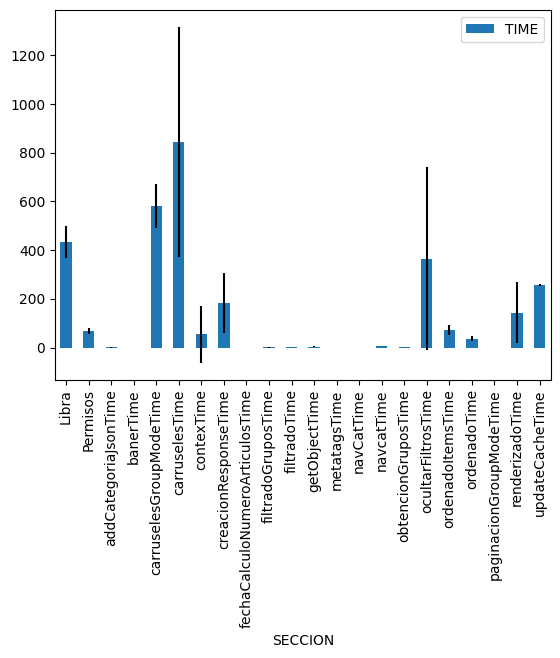

In [8]:
categorias_group_mode = df[df["URL"].str.contains("group_mode=true")]
categorias_art_mode = df[(~(df["URL"].str.contains(r"group_mode=true", regex=True)) & (df["VISTA"] == "categoria"))]

#categorias_art_mode = categorias_art_mode[categorias_art_mode["VISTA"] == "categoria"]

categoria_filtrado = categorias_group_mode[(categorias_group_mode["SECCION"] != "Renderizado") & (categorias_group_mode["SECCION"] != "Datos")]

categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2)

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))

In [11]:
categorias_group_mode = df[df["URL"].str.contains("group_mode=true")]
categorias_art_mode = df[~(df["URL"].str.contains(r"group_mode=true", regex=True))]

#categorias_art_mode = categorias_art_mode[categorias_art_mode["VISTA"] == "categoria"]

categorias_art_mode = categorias_art_mode.groupby(["URL", "VISTA"]).sum()

print(categorias_art_mode.groupby("VISTA").mean())

                  TIME
VISTA                 
articulo   7814.186707
categoria  3679.632530
grupo      1793.310754


                                        TIME
SECCION                                     
Libra                             605.939015
Permisos                           69.857254
addCategoriaJsonTime                0.769599
banerTime                           0.077367
cacheoPreciosTime                 834.578830
carruselesGroupModeTime           689.914140
carruselesTime                    848.555378
contexTime                         54.666570
creacionResponseTime              302.741842
fechaCalculoNumeroArticulosTime   118.470813
filtradoGruposTime                  1.322149
filtradoTime                        1.818420
getObjectTime                       4.537768
metatagsTime                        0.048958
navCatTime                          0.183173
navcatTime                          7.082034
obtencionGruposTime                 5.122860
ocultarFiltrosTime                575.058604
ordenadoItemsTime                  83.510597
ordenadoTime                       37.172146
paginacion

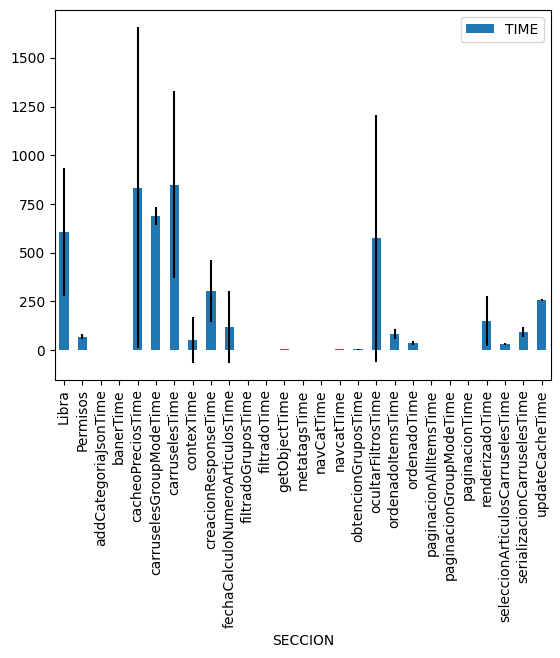

In [9]:
categorias_group_mode = df[df["URL"].str.contains("group_mode=true")]
categorias_art_mode = df[(~(df["URL"].str.contains(r"group_mode=true", regex=True)) & (df["VISTA"] == "categoria"))]

#categorias_art_mode = categorias_art_mode[categorias_art_mode["VISTA"] == "categoria"]

categoria_filtrado = categorias_art_mode[(categorias_art_mode["SECCION"] != "Renderizado") & (categorias_art_mode["SECCION"] != "Datos")]

categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2)

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))